In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
data_path = '../../data/raw_data/chess/games.csv'  
df = pd.read_csv(data_path)

# Drop columns that are not useful for the k-NN algorithm
df = df.drop(columns=['id', 'rated', 'created_at', 'last_move_at', 'white_id', 'black_id', 'moves', 'winner'])

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['victory_status'] = label_encoder.fit_transform(df['victory_status'])
df['opening_name'] = label_encoder.fit_transform(df['opening_name'])
df['increment_code'] = label_encoder.fit_transform(df['increment_code'])
df['opening_eco'] = label_encoder.fit_transform(df['opening_eco'])

# Define features (X) and target variable (y)
X = df.drop(columns='victory_status')
y = df['victory_status']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier with all parameters explicitly defined
knn = KNeighborsClassifier(
    n_neighbors=100,        # Number of neighbors to use
    weights='distance',      # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',       # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,           # Leaf size for 'ball_tree' or 'kd_tree'
    p=2,                    # Power parameter for the Minkowski metric (p=2 corresponds to Euclidean distance)
    metric='minkowski',     # Distance metric used ('minkowski', 'euclidean', 'manhattan', etc.)
    metric_params=None,     # Additional keyword arguments for the metric function
    n_jobs=None             # Number of parallel jobs to run (-1 uses all available cores)
)

# Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100, weights='distance')

In [28]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6069292123629113
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.17       181
           1       0.57      0.29      0.39      1295
           2       1.00      0.06      0.11       336
           3       0.61      0.92      0.73      2200

    accuracy                           0.61      4012
   macro avg       0.80      0.34      0.35      4012
weighted avg       0.65      0.61      0.54      4012

Confusion Matrix:
 [[  17   39    0  125]
 [   0  378    0  917]
 [   0   63   19  254]
 [   0  179    0 2021]]


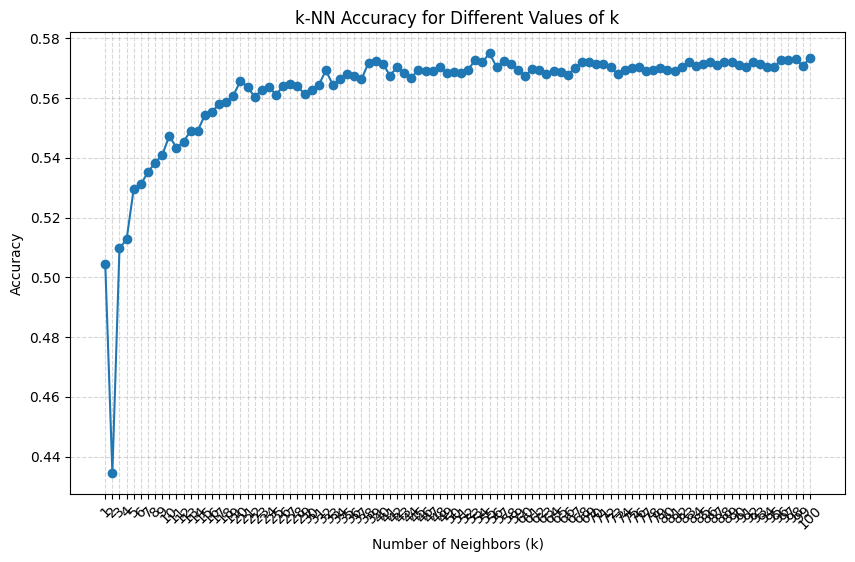

In [9]:
# List to store accuracy for different values of k
k_values = range(1, 101)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("k-NN Accuracy for Different Values of k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values, rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
#Tuning weights

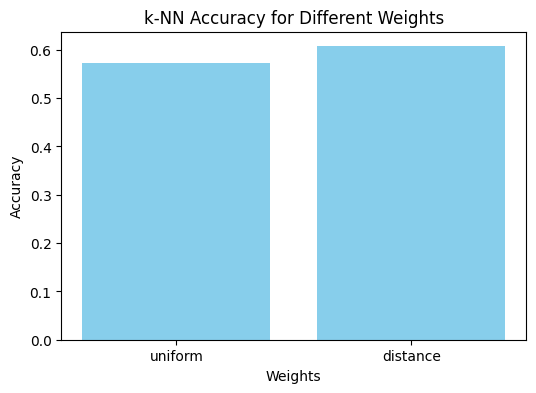

In [18]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List to store accuracy for different weight functions
weights_options = ['uniform', 'distance']
accuracies = []

for weight in weights_options:
    knn = KNeighborsClassifier(n_neighbors=100, weights=weight)  # Using k=5 as a base value
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the accuracies
plt.figure(figsize=(6, 4))
plt.bar(weights_options, accuracies, color='skyblue')
plt.title("k-NN Accuracy for Different Weights")
plt.xlabel("Weights")
plt.ylabel("Accuracy")
plt.show()


In [16]:
#Tuning algoriythm

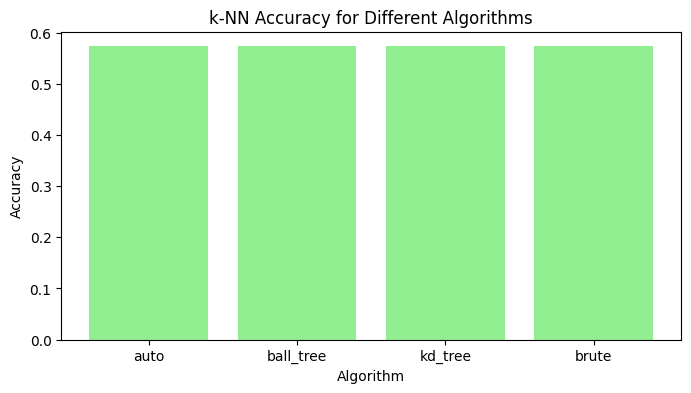

In [19]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List to store accuracy for different algorithms
algorithm_options = ['auto', 'ball_tree', 'kd_tree', 'brute']
accuracies = []

for algo in algorithm_options:
    knn = KNeighborsClassifier(n_neighbors=100, algorithm=algo)  # Using k=5 as a base value
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the accuracies
plt.figure(figsize=(8, 4))
plt.bar(algorithm_options, accuracies, color='lightgreen')
plt.title("k-NN Accuracy for Different Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()


In [20]:
#tuning leafe size

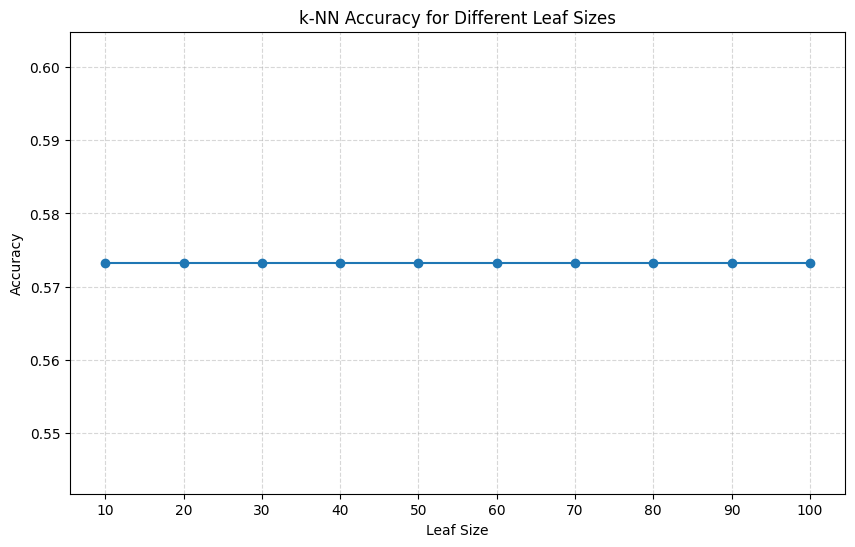

In [25]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List to store accuracy for different leaf sizes
leaf_sizes = range(10, 101, 10)
accuracies = []

for leaf_size in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=100, leaf_size=leaf_size)  # Using k=5 as a base value
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(leaf_sizes, accuracies, marker='o', linestyle='-')
plt.title("k-NN Accuracy for Different Leaf Sizes")
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy")
plt.xticks(leaf_sizes)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [22]:
#Tuning p Parameter for Minkowski Distance

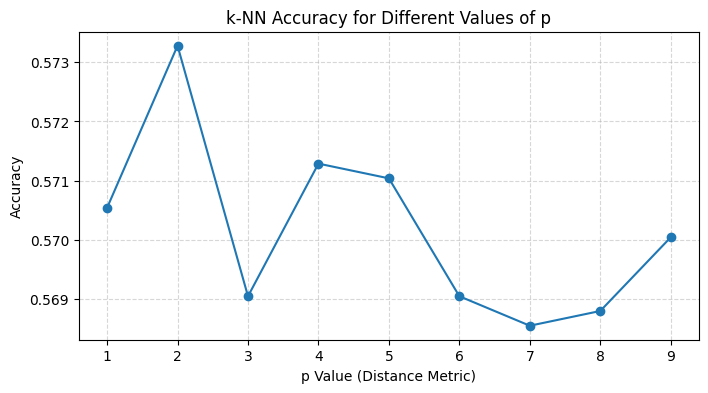

In [26]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List to store accuracy for different values of p
p_values = [1, 2, 3, 4, 5,6,7,8,9]
accuracies = []

for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=100, p=p)  # Using k=5 as a base value
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the accuracies
plt.figure(figsize=(8, 4))
plt.plot(p_values, accuracies, marker='o', linestyle='-')
plt.title("k-NN Accuracy for Different Values of p")
plt.xlabel("p Value (Distance Metric)")
plt.ylabel("Accuracy")
plt.xticks(p_values)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()